In [11]:
import pickle
import numpy as np
import pandas as pd
from msresist.validations import preprocess_ebdt_mcf7, upstreamKin_and_pdts_perCluster
from msresist.clustering import MassSpecClustering

In [2]:
x = preprocess_ebdt_mcf7()
d = x.select_dtypes(include=['float64']).T
i = x.select_dtypes(include=['object'])

Load model

In [3]:
with open('msresist/data/pickled_models/ebdt_mcf7_pam250_CL12_W5', 'rb') as f:
    pam_model = pickle.load(f)[0]

Find centers

In [4]:
centers = pd.DataFrame(pam_model.transform())
centers.columns = np.arange(pam_model.ncl) + 1
centers.insert(0, "Sample", x.columns[3:])
centers["Sample"] = [s.split(".")[1].split(".")[0]  for s in centers["Sample"]]

PCA

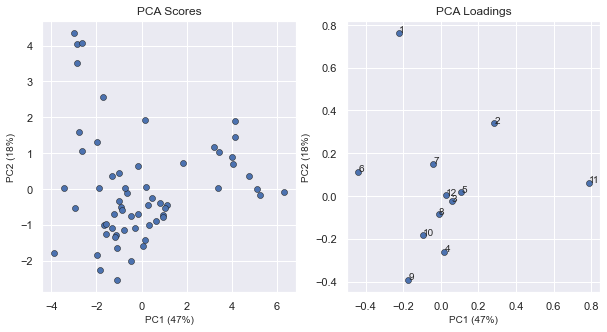

In [5]:
from msresist.figures.figure3 import plotPCA
import matplotlib.pyplot as plt

_, ax = plt.subplots(1, 2, figsize=(10, 5))

plotPCA(ax, centers, 2, ["Sample"], "Cluster")

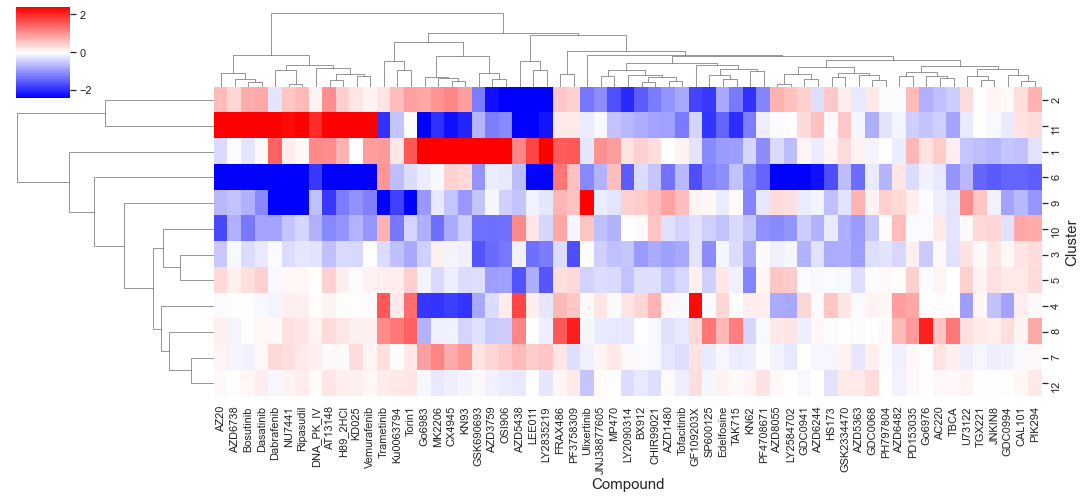

In [6]:
import seaborn as sns

def plotClustergram(data, title="", lim=False, robust=True, xticklabels=False, yticklabels=False, ylabel="", xlabel="", figsize=(10, 10)):
    """ Clustergram plot. """
    g = sns.clustermap(data, method="complete", cmap="bwr", robust=robust, vmax=lim, vmin=-lim, figsize=figsize, xticklabels=xticklabels, yticklabels=yticklabels)
    g.fig.suptitle(title, fontsize=17)
    ax = g.ax_heatmap
    ax.set_ylabel(ylabel, fontsize=15)
    ax.set_xlabel(xlabel, fontsize=15)
    return g

d = centers.set_index("Sample")
g = plotClustergram(d.T, lim=max(abs(d)) * 0.2, xticklabels=True, yticklabels=True, ylabel="Cluster", xlabel="Compound", figsize=(15, 7))


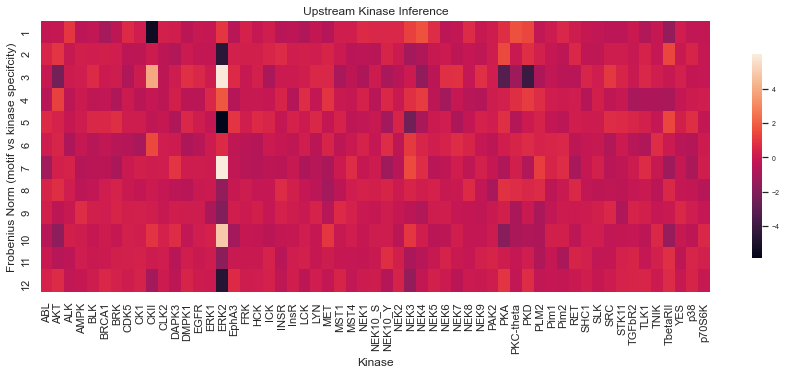

In [7]:
from msresist.figures.figure3 import plotUpstreamKinase_heatmap, plotMotifs

_, ax = plt.subplots(1, 1, figsize=(15, 5))
plotUpstreamKinase_heatmap(pam_model, list(np.arange(pam_model.ncl) + 1), ax)

## Kinase-cluster associations looking at effect of targeted drugs on clusters



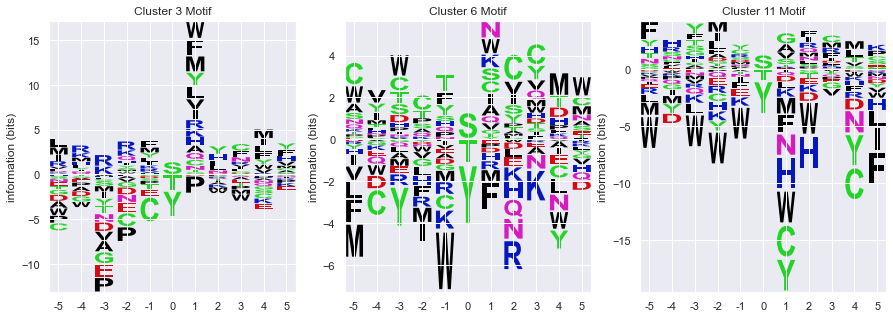

In [8]:
from msresist.figures.figure3 import plotMotifs

_, ax = plt.subplots(1, 3, figsize=(15, 5))

pssms = pam_model.pssms(PsP_background=False)
motifs = [pssms[2], pssms[5], pssms[10]]
plotMotifs(motifs, titles=["Cluster 3", "Cluster 6", "Cluster 11"], axes=ax)

## Validations
1. Looks for enrichment of PDTs of specific upstream kinases in each cluster and compare to our predictions
2. Use KSEA / NetworKIN to predict upstream kinases
3. PsP data set (?)

In [34]:
members = pd.read_csv("msresist/data/cluster_members/ebdt_pam250_12CL_W5_members_C" + str(1) + ".csv")
gene_pos = list(zip(members["gene"], members["pos"]))
members = [g + "(" + p + ")" for g, p in gene_pos]

In [54]:
upkins = upstreamKin_and_pdts_perCluster(pam_model)

In [69]:
x

,Sequence,gene,pos,MCF7.AZD6482.fold,MCF7.CAL101.fold,MCF7.GDC0941.fold,MCF7.HS173.fold,MCF7.PIK294.fold,MCF7.TGX221.fold,MCF7.CX4945.fold,MCF7.Go6983.fold,MCF7.KN93.fold,MCF7.MK2206.fold,MCF7.AZD5438.fold,MCF7.FRAX486.fold,...,MCF7.SP600125.fold,MCF7.TAK715.fold,MCF7.TBCA.fold,MCF7.AT13148.fold,MCF7.AZ20.fold,MCF7.AZD6738.fold,MCF7.Bosutinib.fold,MCF7.Dabrafenib.fold,MCF7.Dasatinib.fold,MCF7.DNA_PK_IV.fold,MCF7.H89_2HCl.fold,MCF7.KD025.fold,MCF7.NU7441.fold,MCF7.Ripasudil.fold,MCF7.Vemurafenib.fold
0,AVGERtPRKKE,KDM1A,T59,0.084442,-0.634131,0.028610,1.400846,-1.646478,-2.883383,23.220019,34.893047,22.597574,43.455835,-22.617484,28.065417,...,-0.027778,12.688326,10.546345,-0.363317,0.133773,-0.816002,0.553087,-2.335916,-0.292999,0.127971,-0.766835,-11.493049,-0.110461,-12.899091,-21.867633
1,LAAPSsPTPES,INCENP,S143,-0.103156,0.645289,0.400173,0.823636,1.881304,0.834433,-0.101276,-0.450117,-1.877287,-0.822431,0.722217,0.920283,...,-1.064344,0.411348,-0.341320,-1.916582,-2.943632,-2.435133,-2.145958,-1.075475,-0.899446,-1.491962,-1.593263,-3.017445,-1.161612,-1.665850,-0.163219
2,ALAAPsSPTPE,INCENP,S142,-0.243417,0.380883,0.270414,-0.466303,0.635270,-0.127871,2.762526,-9.809528,-8.000805,-10.067061,3.809136,2.639327,...,-0.050678,0.109054,0.126848,-42.659408,-43.524137,-43.053603,-43.238807,-43.863442,-43.627706,-12.718534,-43.020431,-43.071443,-31.411652,-31.837557,-43.456143
3,AAAAAtMALAA,INCENP,T135,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.328758,-0.328758,-0.328758,-0.378758,0.489595,0.192810,...,-0.027778,0.000000,0.000000,11.836823,11.812618,0.000000,0.000000,0.000000,11.917005,0.000000,0.000000,23.744994,11.809463,24.966396,12.044048
4,ATAPPsPGPAQ,SAMD1,S161,0.151040,0.937267,-1.172846,0.607844,0.568630,0.319092,-0.300021,-1.249198,-1.284241,-0.651394,-2.003911,1.176178,...,0.337683,0.340256,0.599414,-0.427753,-0.434153,-0.368766,0.466010,-1.675485,-0.178616,-0.334100,0.244641,0.009544,-0.164790,-0.388666,-1.191934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8857,GPASPtHKLPP,EPS8L2,T572,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.328758,-0.328758,-0.328758,-0.378758,0.489595,0.192810,...,-0.027778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8858,YWGPAsPTHKL,EPS8L2,S570,0.327744,0.773590,-0.285270,-1.051489,1.162680,0.850717,-0.714446,-2.912882,-2.217861,0.379418,0.181398,-0.912471,...,0.625907,-0.702636,0.834354,2.663087,0.736430,0.827652,-1.071234,0.454968,0.454600,1.412112,1.279123,1.312424,-0.691916,0.564986,0.281540
8859,QTRYYsPCEEH,ARHGEF35,S184,-0.390202,-0.534416,1.082811,-0.104381,-0.635582,-0.525374,-1.276026,-1.167076,-0.703398,-0.520531,1.562161,0.260247,...,0.098580,-0.547249,0.890630,-0.657735,-1.983075,-2.302914,-2.786883,-4.850780,-1.924602,0.323082,-1.230941,0.238935,-0.722647,-1.573604,-3.191597
8860,QTRYYsPCEEH,ARHGEF5,S184,-0.576073,-0.305443,0.945017,0.713996,-0.530806,-0.490793,10.259199,9.617484,9.911043,10.758769,13.181404,13.294962,...,-0.103535,-0.426267,1.467600,0.410934,-0.067345,-12.031280,-2.053477,-1.735280,-0.027857,1.967704,-11.703955,0.449854,1.347487,0.596738,-1.768355
